# Лабораторная 4

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

## 1.1 Решающее дерево

Прежде, чем переходить к математическим формулам - рассмотрим простой пример. 

Пусть мы хотим прогнозировать выплатит ли клиент кредит, основываясь на некоторых признаках. Предположим, что у нас есть набор данных, содержащий информацию о клиентах(зарплата, кредитный рейтинг, информация о других кредитах). А также нам известно выплатил клиент кредит или нет. Мы хотим спрогнозировать, выплатит ли кредит новый клиент.   

Решающее дерево может выглядеть следующим образом:

Вопрос 1. **Зарплата меньше 47500?**
- Если Нет, переходим к следующему вопросу:
- Если Да, то классифицируем как "не выплатит".

Вопрос 2. **Количество невыплаченных кредитов за прошлый год меньше 3?**
- Если Да, классифицируем как "выплатит".
- Если Нет, то классифицируем как "не выплатит".

Это пример того, как решающее дерево может быть применено для задачи классификации в финансовой сфере. Конечно, не стоит рассматривать его серьёзно)

Для лучшего понимания, визуализируем данное решающее дерево. Что такое *gini, samples, values* нас пока не интересует.  

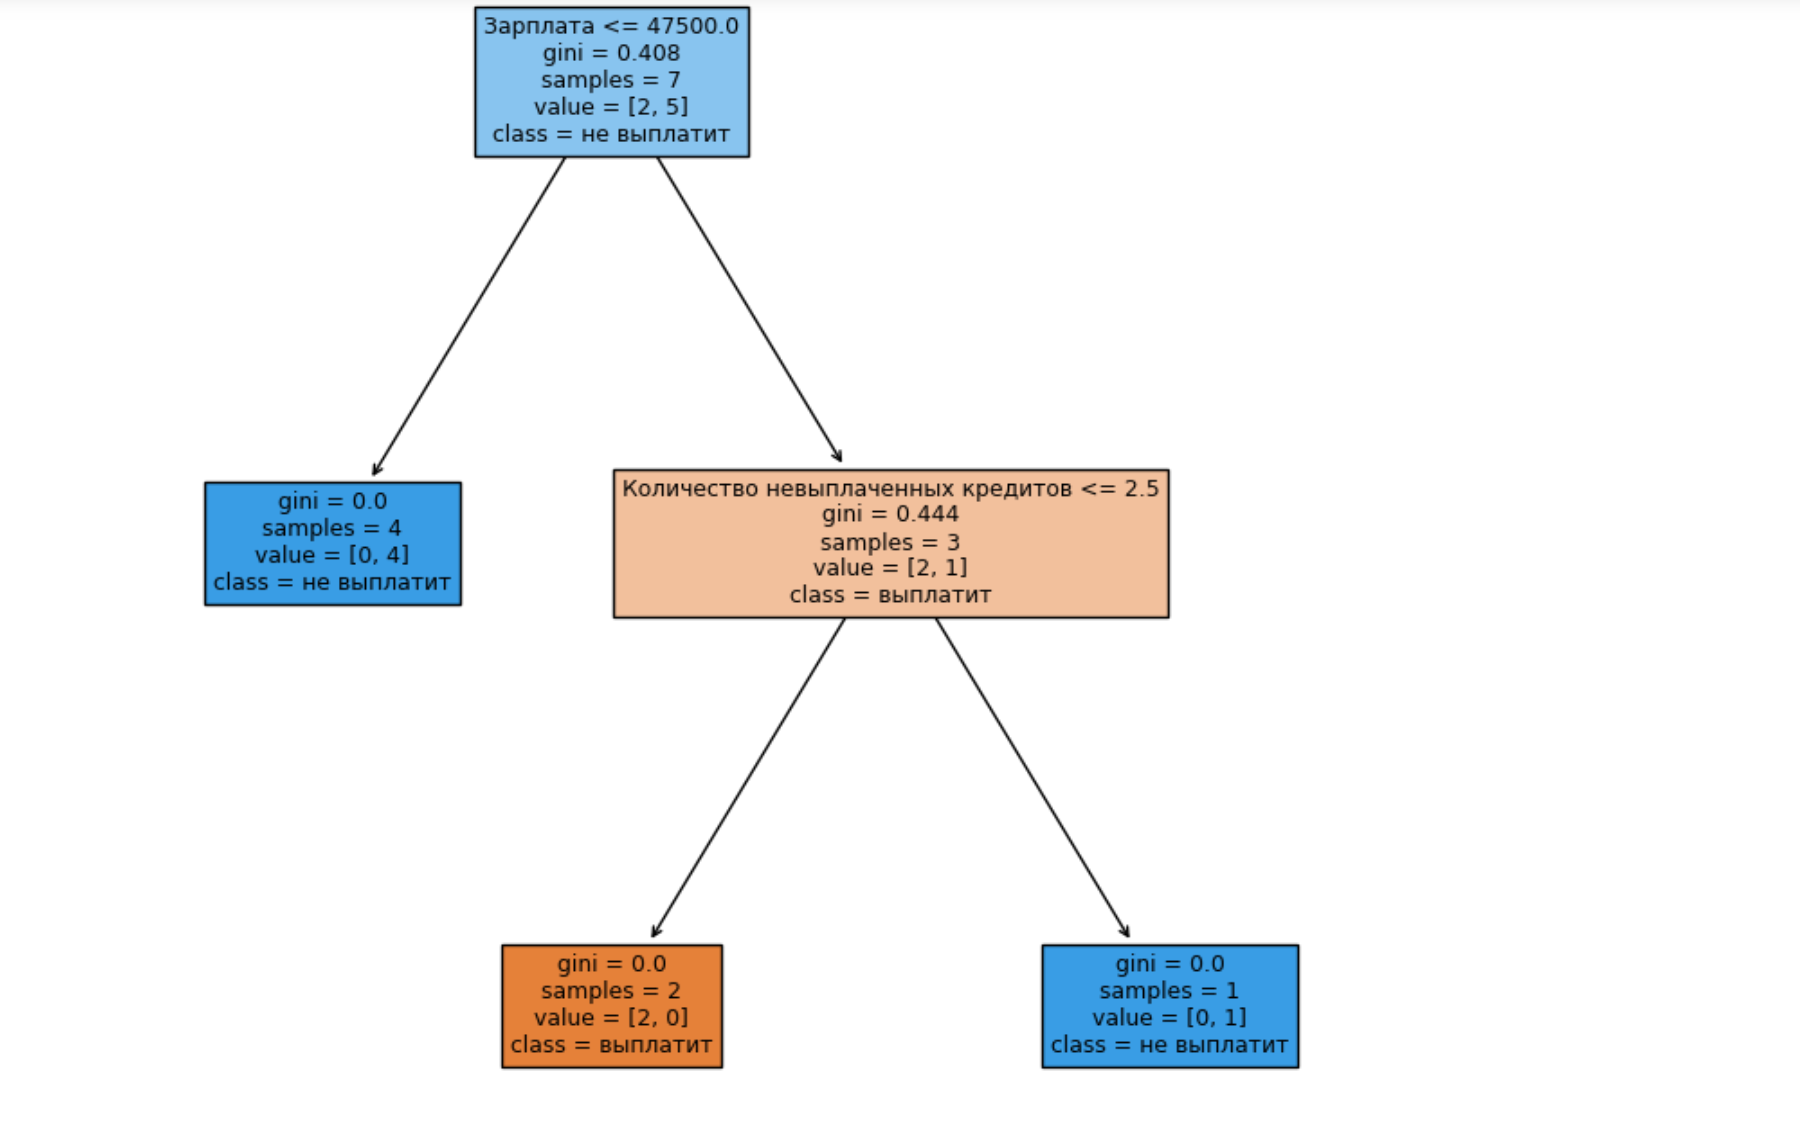

***Теперь мы готовы дать более строго определение***. 

Формально, решающее дерево можно определить как совокупность узлов и ребер(***бинарное дерево***), где:
1. Каждый узел проверяет значение определенного признака.
2. Каждое ребро соответствует возможному результату этой проверки.
3. Листовые узлы содержат прогноз или класс для объекта на основе значений признаков.

Для каждого объекта $x$ движение начинается из корня. В каждой вершине мы проверяем условие. Если условие истинно, то движемся в правое ребро, если ложно, то движимся в левое ребро. 

Стоит заметить, что функция, которой представлено решающее дерево, является кусочно-постоянной. Градиент такой функции равен 0. Поэтому, градиентный спуск для поиска оптимальных значений здесь уже не подходит. 

## 1.2 Построение решающего дерева

Построение лучшего с точки зрения качества на обучающей выборке дерева минимальной глубины ***является NP-полной задачей***. Поэтому на практике используют различные эвристики для построения решающего дерева. 

Построение решающего дерева:

1. **Выбор корня дерева**.
2. **Разбиение данных:** Данные разделяются на две части $X_{left}$ и $X_{right}$ в зависимости от значения выбранного признака. 
3. **Рекурсивное построение дерева:** Процесс разбиения и выбора следующего признака повторяется для каждого полученного поддерева для $X_{left}$ и $X_{right}$, пока не будет выполнен критерий остановки.

***Критерием остановки*** может быть: минимальное количество образцов в листьях, максимальная глубина дерева и т.д.  


## 1.3 Критерий ветвления(разделение данных)

Выбор критерия ветвления зависит от типа задачи (классификация или регрессия) и данных. 

Критерий ветвления в контексте решающих деревьев - это способ определения того, как разбить набор данных на более мелкие подданные внутри каждого узла дерева.

Информативность в этом контексте обычно определяется с использованием понятия "прироста информации" (information gain) или "прироста чистоты" (purity gain). Информативность указывает на то, насколько хорошо разбиение с определенным критерием ветвления помогает уменьшить неопределенность в данных.

Прирост информации измеряется как разница между начальной неопределенностью и средней неопределенностью дочерних узлов после разбиения. Чем выше прирост информации, тем лучше разбиение. Обычно для вычисления прироста информации используется критерий энтропии или индекс Джини.

Пусть для узла с множеством объектов $X$, есть разбиение на $X_{left}$ и $X_{right}$. Тогда критерий ветвления будет иметь следующий вид:


$$ Branch(X) = |X|H(X) - |X_{left}|H(X_{left}) - |X_{right}|H(X_{right}) $$

***И чем выше данное значение, тем лучше разбиение данных определённого узла.***

***Энтропийный критерий*** (или критерий информационной энтропии) является одним из критериев ветвления, используемых при построении решающих деревьев в задачах классификации. Он основан на понятии энтропии и измеряет степень хаоса или неопределенности в данных.

Информационная энтропия для узла $v$ с множеством объектов $X$ определяется следующим образом:
$$H(X) = -\sum_{i=1}^{C} p(i|v) \log_2 p(i|v)$$
где:
- $C$ - количество классов
- $p(i|v)$ - доля объектов класса $i$ в узле $v$

Энтропия достигает максимума при равном распределении объектов по классам и минимума, когда все объекты относятся к одному классу.

В задаче классификации, ***критерий Джини*** - это один из способов измерения информативности разбиения при построении решающих деревьев. Иногда его называют "Индексом Джини" или "Индексом неопределенности Джини". Критерий Джини используется для оценки того, насколько хорошо разбиение узла уменьшает неопределенность (или "чистоту") данных.

Индекс Джини для узла с множеством объектов $X$ различными классами определяется следующим образом:

$$ {Gini}(X) = \sum_{i=1}^{C} (1-p_i)p_i $$

где:
- $p_i$ - доля объектов класса $i$ в узле

Критерий Джини принимает значение от 0 до 1. Чем ближе значение к 0, тем чище (более однородные по классам) узел, а чем ближе к 1, тем более неопределенными (менее однородными) являются данные в узле.

### Задача 1(2 балла)

1. Реализуйте функцию, вычисляющую энтропию для данного узла(принимает на вход множество X).
2. Реализуйте функцию, вычисляющую индекс Джини для данного узла(принимает на вход множество X).

In [3]:
a = set([1, 2, 3, 3])
a = list(a)
a

[1, 2, 3]

In [35]:
def entropy (x):
    a = list(set(x))
    C = len(a)
    b = []
    for i in range (C):
        b.append(x.count(a[i]) / len(x))

    H = 0

    for i in range (len(b)):
        H += b[i] * np.log(b[i])
    return -H

x = [1, 2, 3, 2, 1]
print(entropy(x))

1.0549201679861442


In [5]:
def Gini(x):
    a = list(set(x))
    C = len(a)
    b = []
    for i in range (C):
        b.append(x.count(a[i]) / len(x))

    G = 0

    for i in range (len(b)):
        G += b[i] * (1 - (b[i]))
    return G

x = [1, 2, 3, 2, 1]
print(Gini(x))

0.64


## 2. Решающее дерево в scikit-learn

***Гиперпараметры:***

***criterion*** = 'gini' - функция для измерения качества разбиения. Поддерживаются критерии 'gini' для неодородности Джини и 'entropy' для прироста информации

***splitter***='best' - стратегия, используемая для выбора разбиения в каждом узле. Поддерживаются стратегии 'best' для выбора лучшего разбиения и 'random' для выбора лучшего рандомного разбиения

***max_depth***=None - максимальная глубина дерева. Если None, то дерево строится до тех пор, пока в каждом листе не будет только один класс или пока каждый лист не будет содержать количество экземпляров, равное min_samples_split.

***max_leaf_nodes***=None - максимальное количество листьев. Дерево строится исходя из ограничения на максимальное количество листьев. Остаются только те листья, которые максимально уменьшают неоднородность.

***min_impurity_decrease***=0.0 - минимальное уменьшение неоднородности. Узел расщепляется, если неоднородность уменьшается на число больше или равное min_impurity_decrease.

Это лишь самые популярные гиперпараметры. На самом деле их намного больше. 

In [44]:
# Загрузка датасета о раке груди
data = load_breast_cancer()
X, y = data.data, data.target

# Разделение датасета на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели решающего дерева
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Предсказание
y_pred = clf.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


### Задача 2(3 балла)
1. Рассчитывайте точность с помощью кросс-валидации с разбиением на 10 частей. 
2. Найдите оптимальные гиперпараметры среди: criterion, max_depth. 
3. Постройте графики зависимости точности от max_depth для двух разных критериев. 

In [39]:
from sklearn.model_selection import cross_val_score
data = load_breast_cancer()
X, y = data.data, data.target
clf = DecisionTreeClassifier()
print(np.mean(cross_val_score(clf, X, y, cv = 10)))

0.9140037593984962


In [8]:
from sklearn.model_selection import cross_val_score
data = load_breast_cancer()
X, y = data.data, data.target
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


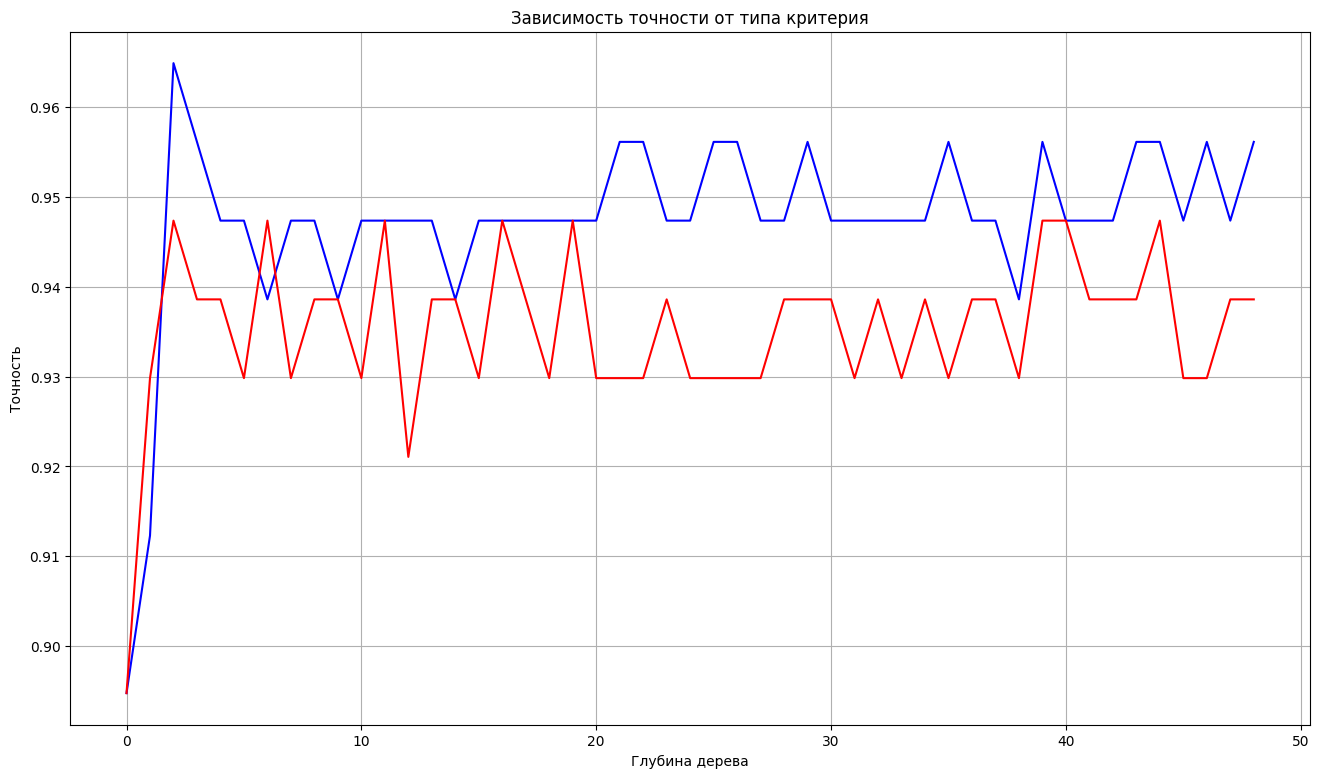

In [45]:
from matplotlib import pyplot as plt
data = load_breast_cancer()
X, y = data.data, data.target

accuracy1 = []
accuracy2 = []

for i in range (1, 50):
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy1.append(accuracy_score(y_test, y_pred))

for i in range (1, 50):
    clf = DecisionTreeClassifier(criterion = 'gini', max_depth = i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy2.append(accuracy_score(y_test, y_pred))


fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(accuracy1, c = 'b')
plt.plot(accuracy2, c = 'r')
plt.grid()
plt.title('Зависимость точности от типа критерия')
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.show()

***Переобучение*** 

Представьте, что у вас есть выборка данных о погоде, включающая информацию о температуре, влажности и скорости ветра, а также о том, произошёл ли дождь. Вы хотите построить решающее дерево, чтобы предсказать, будет ли дождь на основе этих параметров.

Если вы построите слишком сложное решающее дерево, возможно, оно будет идеально подстраиваться под ваши тренировочные данные. Например, решающее дерево может создать очень глубокое разделение данных, чтобы точно различать случаи, когда дождь идёт при определённой температуре, определённой влажности и определённой скорости ветра.

Однако такая ситуация может привести к переобучению. Это означает, что модель становится слишком специфичной для тренировочных данных и теряет способность обобщать на новые данные. Таким образом, если у вас будет аномальное значение температуры, влажности или скорости ветра вновь поступивших данных, ваше слишком сложное решающее дерево может дать неправильный прогноз о том, будет ли идти дождь.

## 3.1 Случайный лес

***Случайный лес*** - это ансамблевая модель машинного обучения, которая состоит из множества решающих деревьев. Основная идея случайного леса заключается в том, что каждое дерево строится независимо друг от друга, используя случайные подвыборки данных и случайные подмножества признаков.

Основные этапы построения:

***Бутстрэп выборка***: Для построения каждого дерева случайного леса используется бутстрэп выборка, то есть случайная выборка из исходного набора данных. Это позволяет создавать различные подвыборки для каждого дерева.

***Случайный выбор признаков***: При разбиении узлов в каждом дереве случайного леса, выбирается случайное подмножество признаков. Это позволяет деревьям быть разнообразными и уменьшает корреляцию между ними.

***Итоговое предсказание***: При получении новых данных, случайный лес объединяет предсказание каждого дерева и использует их для получения окончательного предсказания. Обычно это осуществляется путем усреднения предсказаний для задачи регрессии или голосования большинства для задачи классификации.

Преимущества случайного леса включают в себя хорошую способность к обобщению, устойчивость к переобучению, способность работы с большим количеством признаков и автоматическое устранение шума. Случайный лес часто используется в практике машинного обучения для задач классификации и регрессии благодаря своей высокой производительности и эффективности.

## 3.2 Случайный лес в scikit-learn

***Гиперпараметры:***

***n_estimators***: количество деревьев в случайном лесу.

***criterion***: функция для измерения качества разделения. Для классификации обычно используется "gini", а для регрессии - "mse" (среднеквадратичная ошибка).

***max_depth***: максимальная глубина каждого дерева.

***min_samples_split***: минимальное количество образцов, необходимое для разделения внутреннего узла.

***min_samples_leaf***: минимальное количество образцов в листовом узле.

***max_features***: количество признаков, рассматриваемых при разделении.

Это лишь самые популярные гиперпараметры. На самом деле их намного больше.

In [46]:
# Загрузка данных
data = load_breast_cancer()
X, y = data.data, data.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.9649122807017544


### Задача 3(3 балла)
1. Рассчитывайте точность с помощью кросс-валидации с разбиением на 10 частей. 
2. Найдите оптимальные гиперпараметры среди: n_estimators, criterion, max_depth. 
3. Постройте графики зависимости точности от n_estimators. 

In [12]:
data = load_breast_cancer()
X, y = data.data, data.target
clf = RandomForestClassifier(n_estimators=100, random_state=42)
print(np.mean(cross_val_score(clf, X, y, cv = 10)))

0.9631578947368421


In [31]:
data = load_breast_cancer()
X, y = data.data, data.target
clf = RandomForestClassifier(n_estimators=25, random_state=42, criterion = 'entropy', max_depth = 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9736842105263158


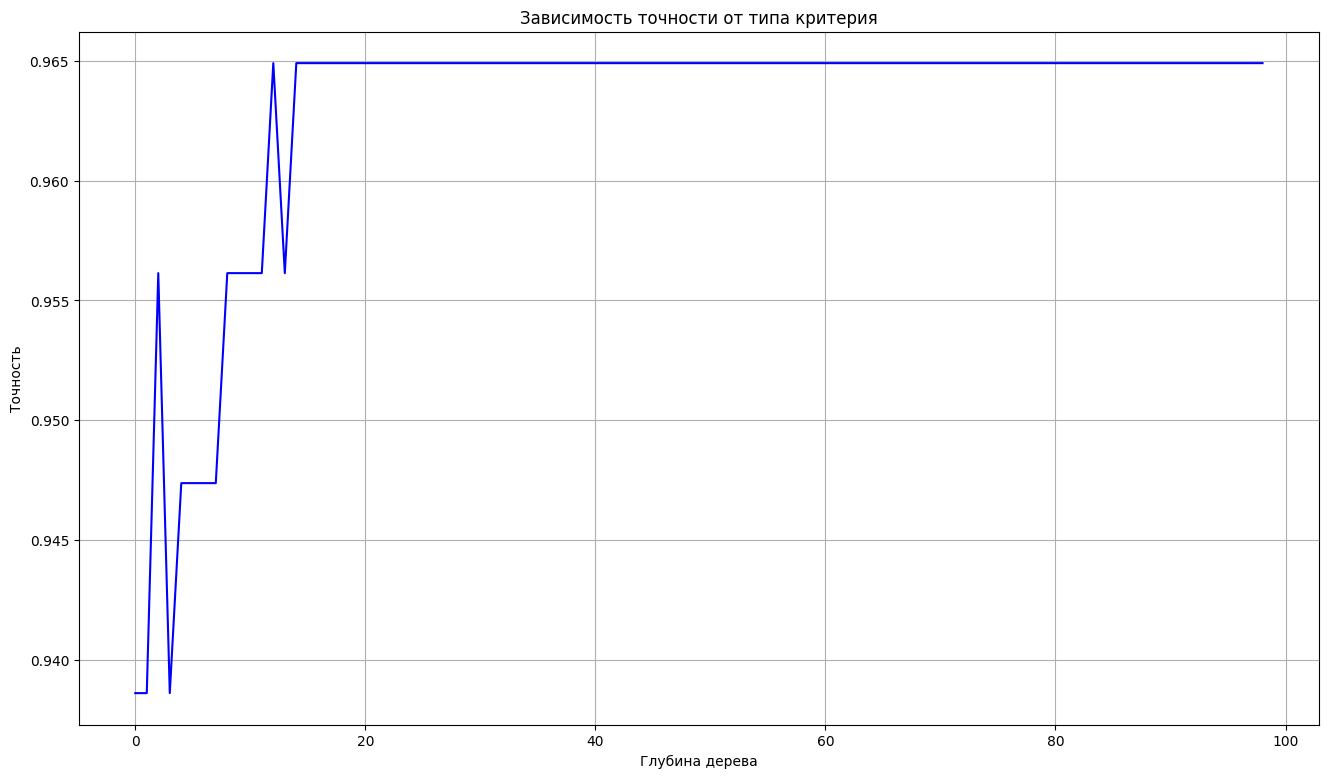

In [34]:
from matplotlib import pyplot as plt
data = load_breast_cancer()
X, y = data.data, data.target

accuracy = []

for i in range (1, 100):
    clf = RandomForestClassifier(n_estimators=i, random_state=42)    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))


fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(accuracy, c = 'b')
plt.grid()
plt.title('Зависимость точности от типа критерия')
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.show()

### Задача 4(2 балла)

1. Пусть число объектов обучающей выборки равно n. Чему может быть равна максимальная глубина дерева?
2. Приведите пример классификации, в которой решающее дерева работает не лучшим образом.
3. Важна или нет нормализация данных в решающих деревьях?

1. n - 1
2. Границы решения кривые, нет чёткого перехода
3. Нет

## 4. Итоги

***Плюсы решающих деревьев:***
1. Просты для понимания и интерпретации. Деревья можно визуализировать.

2. Требует небольшой подготовки данных. Для других методов часто требуются данные нормализации, фиктивные переменные должны быть созданы, а пустые значения быть удалены.

3. Способен работать как с числовыми, так и с категориальными данными. Тем не менее, в scikit-learn пока не поддерживаются категориальные переменные.

4. Использует модель белого ящика. Если данная ситуация наблюдаема в модели, то объяснение условия легко объясняется булевой логикой. Напротив, в модели черного ящика (например, в искусственной нейронной системе) сети), результаты могут быть более сложными для интерпретации.

***Минусы решающих деревьев:***

1. Переобучение, при построении "слишком большого" дерева.

2. Прогнозы деревьев решений не являются ни гладкими, ни непрерывными, следовательно они не умеют экстраполировать.

3. Задача построение оптимального дерева - NP-задача

О случайном лесе мы более подробно поговорим на следующем семинаре. 